In [2]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

### Import Data

In [6]:
transaction = pd.read_excel("Dataset/dunnhumby - Breakfast at the Frat.xlsx", sheet_name="dh Transaction Data")
pd.concat([transaction.head(3), transaction.tail(3)])

WEEK_END_DATE  STORE_NUM          UPC  UNITS  VISITS  HHS   SPEND  \
0         2009-01-14        367   1111009477     13      13   13   18.07   
1         2009-01-14        367   1111009497     20      18   18   27.80   
2         2009-01-14        367   1111009507     14      14   14   19.32   
524947    2012-01-04      29159  88491201426     32      29   23  105.92   
524948    2012-01-04      29159  88491201427     30      26   23   99.30   
524949    2012-01-04      29159  88491212971     20      20   20   44.40   

        PRICE  BASE_PRICE  FEATURE  DISPLAY  TPR_ONLY  
0        1.39        1.57        0        0         1  
1        1.39        1.39        0        0         0  
2        1.38        1.38        0        0         0  
524947   3.31        3.31        0        0         0  
524948   3.31        3.31        0        0         0  
524949   2.22        2.85        0        0         1

In [4]:
product = pd.read_excel("Dataset/dunnhumby - Breakfast at the Frat.xlsx", sheet_name="dh Products Lookup")
pd.concat([product.head(3), product.tail(3)])

UPC                DESCRIPTION   MANUFACTURER     CATEGORY  \
0    1111009477     PL MINI TWIST PRETZELS  PRIVATE LABEL   BAG SNACKS   
1    1111009497          PL PRETZEL STICKS  PRIVATE LABEL   BAG SNACKS   
2    1111009507          PL TWIST PRETZELS  PRIVATE LABEL   BAG SNACKS   
55  88491201426   POST HNY BN OTS HNY RSTD     POST FOODS  COLD CEREAL   
56  88491201427  POST FM SZ HNYBNCH OT ALM     POST FOODS  COLD CEREAL   
57  88491212971        POST FRUITY PEBBLES     POST FOODS  COLD CEREAL   

    SUB_CATEGORY PRODUCT_SIZE  
0       PRETZELS        15 OZ  
1       PRETZELS        15 OZ  
2       PRETZELS        15 OZ  
55  ADULT CEREAL        18 OZ  
56  ADULT CEREAL        18 OZ  
57   KIDS CEREAL        11 OZ

In [5]:
store = pd.read_excel("Dataset/dunnhumby - Breakfast at the Frat.xlsx", sheet_name="dh Store Lookup")
pd.concat([store.head(3), store.tail(3)])

STORE_ID          STORE_NAME ADDRESS_CITY_NAME ADDRESS_STATE_PROV_CODE  \
0        389          SILVERLAKE          ERLANGER                      KY   
1       2277  ANDERSON TOWNE CTR        CINCINNATI                      OH   
2       4259       WARSAW AVENUE        CINCINNATI                      OH   
76     23067      WHIPP & BIGGER         KETTERING                      OH   
77     27175                KATY              KATY                      TX   
78     28909          MIDDLETOWN        MIDDLETOWN                      OH   

    MSA_CODE SEG_VALUE_NAME  PARKING_SPACE_QTY  SALES_AREA_SIZE_NUM  \
0      17140     MAINSTREAM              408.0                46073   
1      17140        UPSCALE                NaN                81958   
2      17140          VALUE                NaN                48813   
76     19380     MAINSTREAM              230.0                37319   
77     26420        UPSCALE                NaN                50224   
78     17140     MAINSTREAM                NaN                85876   

    AVG_WEEKLY_BASKETS  
0         24766.807692  
1         54052.519231  
2         31177.333333  
76        14555.935897  
77        24901.948718  
78        28986.108974

### Data Dimension

In [7]:
print("Transaction: ", transaction.shape)
print("Product: ", product.shape)
print("Store: ", store.shape)

Transaction:  (524950, 12)
Product:  (58, 6)
Store:  (79, 9)


In [7]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524950 entries, 0 to 524949
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   WEEK_END_DATE  524950 non-null  datetime64[ns]
 1   STORE_NUM      524950 non-null  int64         
 2   UPC            524950 non-null  int64         
 3   UNITS          524950 non-null  int64         
 4   VISITS         524950 non-null  int64         
 5   HHS            524950 non-null  int64         
 6   SPEND          524950 non-null  float64       
 7   PRICE          524927 non-null  float64       
 8   BASE_PRICE     524765 non-null  float64       
 9   FEATURE        524950 non-null  int64         
 10  DISPLAY        524950 non-null  int64         
 11  TPR_ONLY       524950 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 48.1 MB


In [ ]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   UPC           58 non-null     int64 
 1   DESCRIPTION   58 non-null     object
 2   MANUFACTURER  58 non-null     object
 3   CATEGORY      58 non-null     object
 4   SUB_CATEGORY  58 non-null     object
 5   PRODUCT_SIZE  58 non-null     object
dtypes: int64(1), object(5)
memory usage: 2.8+ KB


In [ ]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   STORE_ID                 79 non-null     int64  
 1   STORE_NAME               79 non-null     object 
 2   ADDRESS_CITY_NAME        79 non-null     object 
 3   ADDRESS_STATE_PROV_CODE  79 non-null     object 
 4   MSA_CODE                 79 non-null     int64  
 5   SEG_VALUE_NAME           79 non-null     object 
 6   PARKING_SPACE_QTY        27 non-null     float64
 7   SALES_AREA_SIZE_NUM      79 non-null     int64  
 8   AVG_WEEKLY_BASKETS       79 non-null     float64
dtypes: float64(2), int64(3), object(4)
memory usage: 5.7+ KB


### Descriptive Statistics

In [ ]:
transaction[['UNITS','VISITS','HHS','SPEND','PRICE','BASE_PRICE']].describe()

UNITS         VISITS            HHS          SPEND  \
count  524950.000000  524950.000000  524950.000000  524950.000000   
mean       19.608256      17.167349      16.777282      53.200729   
std        29.934184      24.740741      24.186299      68.180697   
min         0.000000       1.000000       1.000000       0.000000   
25%         4.000000       4.000000       4.000000      13.360000   
50%        10.000000       9.000000       9.000000      31.920000   
75%        24.000000      21.000000      21.000000      67.600000   
max      1800.000000    1340.000000    1286.000000    2952.000000   

               PRICE     BASE_PRICE  
count  524927.000000  524765.000000  
mean        3.382174       3.602747  
std         1.559303       1.631726  
min         0.000000       0.550000  
25%         2.360000       2.500000  
50%         2.990000       3.170000  
75%         4.490000       4.590000  
max        11.460000      11.460000

In [ ]:
store[['PARKING_SPACE_QTY', 'SALES_AREA_SIZE_NUM', 'AVG_WEEKLY_BASKETS']].describe()

PARKING_SPACE_QTY  SALES_AREA_SIZE_NUM  AVG_WEEKLY_BASKETS
count          27.000000            79.000000           79.000000
mean          480.518519         49145.164557        24146.806232
std           403.659641         13512.452153         8720.396844
min            17.000000         10788.000000        10434.705128
25%           282.000000         43067.500000        17522.432692
50%           351.000000         48594.000000        24567.750000
75%           488.500000         55200.500000        29186.262821
max          1859.000000         86517.000000        54052.519231

In [ ]:
store[['STORE_ID','STORE_NAME','ADDRESS_CITY_NAME','ADDRESS_STATE_PROV_CODE','MSA_CODE','SEG_VALUE_NAME']].astype('object').describe()

STORE_ID  STORE_NAME ADDRESS_CITY_NAME ADDRESS_STATE_PROV_CODE  \
count         77          77                77                      77   
unique        77          77                51                       4   
top          389  SILVERLAKE        CINCINNATI                      TX   
freq           1           1                 9                      41   

        MSA_CODE SEG_VALUE_NAME  
count         77             77  
unique         9              3  
top        17140     MAINSTREAM  
freq          29             43

In [ ]:
product.astype('object').describe()

UPC               DESCRIPTION   MANUFACTURER    CATEGORY  \
count           58                        58             58          58   
unique          58                        55             17           4   
top     1111009477  PL BL MINT ANTSPTC RINSE  PRIVATE LABEL  BAG SNACKS   
freq             1                         2             12          15   

       SUB_CATEGORY PRODUCT_SIZE  
count            58           58  
unique            7           31  
top        PRETZELS        16 OZ  
freq             15            9

### Skewness

In [ ]:
transaction[['UNITS', 'VISITS', 'HHS', 'SPEND', 'PRICE', 'BASE_PRICE']].skew()

UNITS         6.835946
VISITS        5.853763
HHS           5.798663
SPEND         4.760805
PRICE         0.762841
BASE_PRICE    0.733869
dtype: float64

In [ ]:
store[['PARKING_SPACE_QTY', 'SALES_AREA_SIZE_NUM', 'AVG_WEEKLY_BASKETS']].skew()

PARKING_SPACE_QTY      2.322590
SALES_AREA_SIZE_NUM    0.480190
AVG_WEEKLY_BASKETS     0.890353
dtype: float64

#### Data Validation before Data Pre-Processing

##### Duplicate Records

In [8]:
# Check for duplicate records in each table
print("Duplicated rows in Transaction: ", sum(transaction.duplicated()))
print("Duplicated rows in Product: ", sum(product.duplicated()))
print("Duplicated rows in Store: ", sum(store.duplicated()))

Duplicated rows in Transaction:  0
Duplicated rows in Product:  0
Duplicated rows in Store:  0


In [ ]:
store[store.duplicated(subset=['STORE_ID'], keep=False)]

STORE_ID    STORE_NAME ADDRESS_CITY_NAME ADDRESS_STATE_PROV_CODE  \
22      4503      ROCKWALL          ROCKWALL                      TX   
39     17627  FLOWER MOUND      FLOWER MOUND                      TX   
54     17627  FLOWER MOUND      FLOWER MOUND                      TX   
61      4503      ROCKWALL          ROCKWALL                      TX   

    MSA_CODE SEG_VALUE_NAME  PARKING_SPACE_QTY  SALES_AREA_SIZE_NUM  \
22     19100     MAINSTREAM                NaN                56230   
39     19100     MAINSTREAM              513.0                59213   
54     19100        UPSCALE              513.0                59213   
61     19100        UPSCALE                NaN                56230   

    AVG_WEEKLY_BASKETS  
22        25289.326923  
39        18196.820513  
54        18196.820513  
61        25289.326923

In [ ]:
store[store.duplicated(subset=['STORE_NAME'], keep=False)]

STORE_ID    STORE_NAME ADDRESS_CITY_NAME ADDRESS_STATE_PROV_CODE  \
8      23327       HOUSTON           HOUSTON                      TX   
12       623       HOUSTON           HOUSTON                      TX   
20     21485       HOUSTON              KATY                      TX   
22      4503      ROCKWALL          ROCKWALL                      TX   
23      2513       HOUSTON           HOUSTON                      TX   
39     17627  FLOWER MOUND      FLOWER MOUND                      TX   
54     17627  FLOWER MOUND      FLOWER MOUND                      TX   
55     21221    MIDDLETOWN        MIDDLETOWN                      OH   
61      4503      ROCKWALL          ROCKWALL                      TX   
78     28909    MIDDLETOWN        MIDDLETOWN                      OH   

    MSA_CODE SEG_VALUE_NAME  PARKING_SPACE_QTY  SALES_AREA_SIZE_NUM  \
8      26420     MAINSTREAM                NaN                50722   
12     26420     MAINSTREAM                NaN                46930   
20     26420     MAINSTREAM                NaN                46369   
22     19100     MAINSTREAM                NaN                56230   
23     26420        UPSCALE                NaN                61833   
39     19100     MAINSTREAM              513.0                59213   
54     19100        UPSCALE              513.0                59213   
55     17140          VALUE                NaN                48128   
61     19100        UPSCALE                NaN                56230   
78     17140     MAINSTREAM                NaN                85876   

    AVG_WEEKLY_BASKETS  
8         30258.173077  
12        36740.692308  
20        26472.237179  
22        25289.326923  
23        32422.993590  
39        18196.820513  
54        18196.820513  
55        17009.897436  
61        25289.326923  
78        28986.108974

##### Missing Values

In [9]:
# Identify missing values in transaction data
transaction.isnull().sum()

WEEK_END_DATE      0
STORE_NUM          0
UPC                0
UNITS              0
VISITS             0
HHS                0
SPEND              0
PRICE             23
BASE_PRICE       185
FEATURE            0
DISPLAY            0
TPR_ONLY           0
dtype: int64

In [ ]:
# Identify missing values in product data
product.isnull().sum()

UPC             0
DESCRIPTION     0
MANUFACTURER    0
CATEGORY        0
SUB_CATEGORY    0
PRODUCT_SIZE    0
dtype: int64

In [ ]:
# Identify missing values in store data
store.isnull().sum()

STORE_ID                    0
STORE_NAME                  0
ADDRESS_CITY_NAME           0
ADDRESS_STATE_PROV_CODE     0
MSA_CODE                    0
SEG_VALUE_NAME              0
PARKING_SPACE_QTY          52
SALES_AREA_SIZE_NUM         0
AVG_WEEKLY_BASKETS          0
dtype: int64

##### Outliers

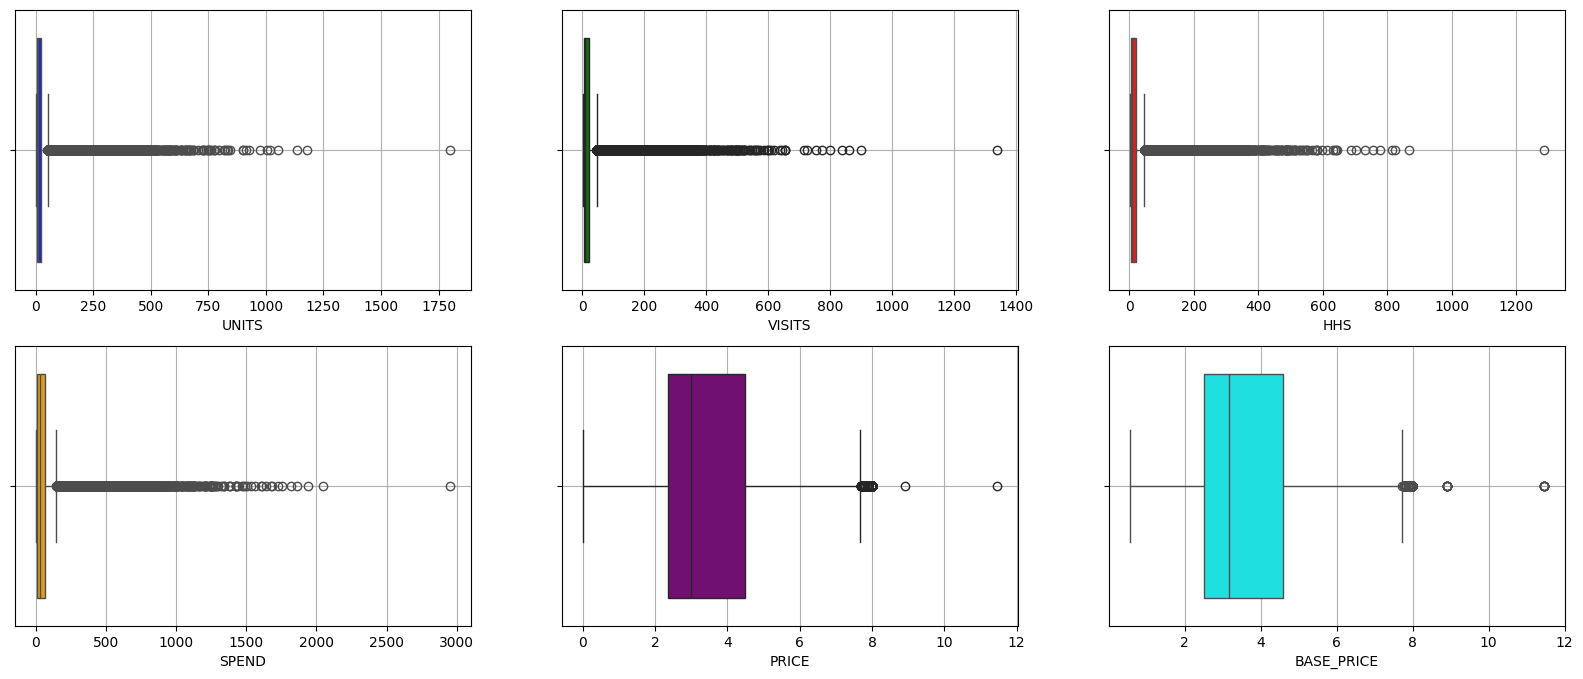

In [ ]:
# Boxplots for transaction data
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 8))

sbn.boxplot(x=transaction['UNITS'], ax=ax[0, 0], color='blue')
ax[0, 0].grid(True)
sbn.boxplot(x=transaction['VISITS'], ax=ax[0, 1], color='green')
ax[0, 1].grid(True)
sbn.boxplot(x=transaction['HHS'], ax=ax[0, 2], color='red')
ax[0, 2].grid(True)
sbn.boxplot(x=transaction['SPEND'], ax=ax[1, 0], color='orange')
ax[1, 0].grid(True)
sbn.boxplot(x=transaction['PRICE'], ax=ax[1, 1], color='purple')
ax[1, 1].grid(True)
sbn.boxplot(x=transaction['BASE_PRICE'], ax=ax[1, 2], color='cyan')
ax[1, 2].grid(True)

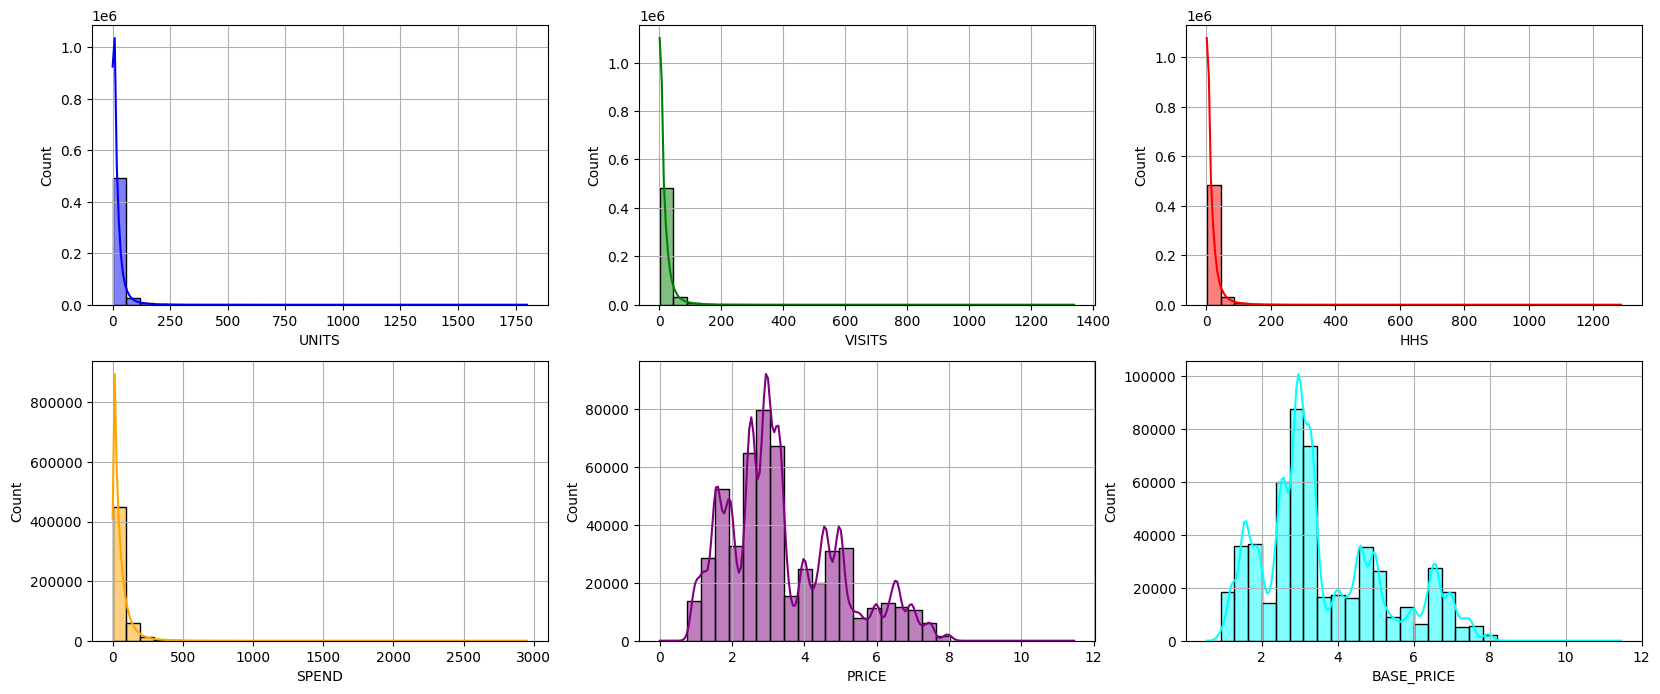

In [ ]:
# Histograms for transaction data
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 8))

sbn.histplot(x=transaction['UNITS'], kde=True, bins=30, ax=ax[0, 0], color='blue')
ax[0, 0].grid(True)
sbn.histplot(x=transaction['VISITS'], kde=True, bins=30, ax=ax[0, 1], color='green')
ax[0, 1].grid(True)
sbn.histplot(x=transaction['HHS'], kde=True, bins=30, ax=ax[0, 2], color='red')
ax[0, 2].grid(True)
sbn.histplot(x=transaction['SPEND'], kde=True, bins=30, ax=ax[1, 0], color='orange')
ax[1, 0].grid(True)
sbn.histplot(x=transaction['PRICE'], kde=True, bins=30, ax=ax[1, 1], color='purple')
ax[1, 1].grid(True)
sbn.histplot(x=transaction['BASE_PRICE'], kde=True, bins=30, ax=ax[1, 2], color='cyan')
ax[1, 2].grid(True)

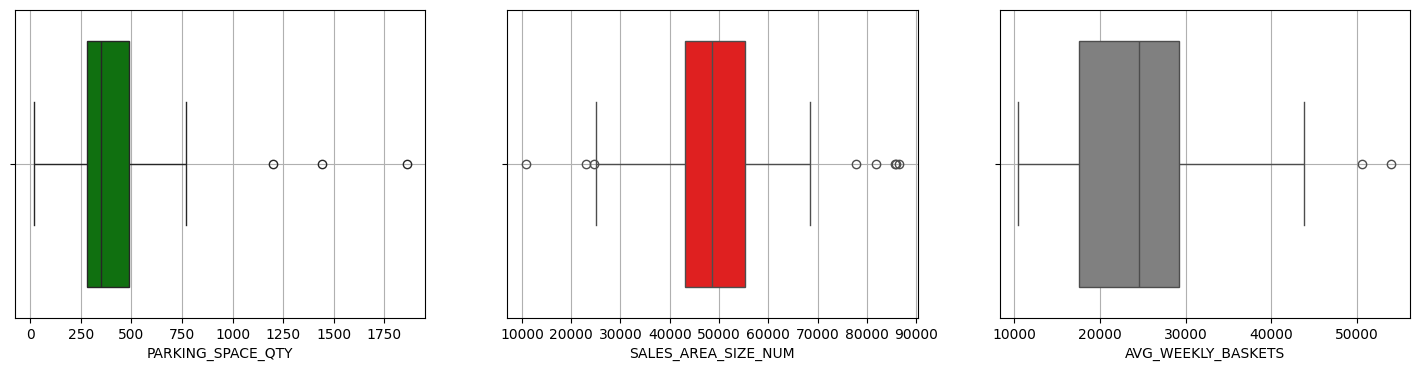

In [ ]:
# Boxplots for store data
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))

sbn.boxplot(x=store['PARKING_SPACE_QTY'], ax=ax[0], color='green')
ax[0].grid(True)
sbn.boxplot(x=store['SALES_AREA_SIZE_NUM'], ax=ax[1], color='red')
ax[1].grid(True)
sbn.boxplot(x=store['AVG_WEEKLY_BASKETS'], ax=ax[2], color='gray')
ax[2].grid(True)

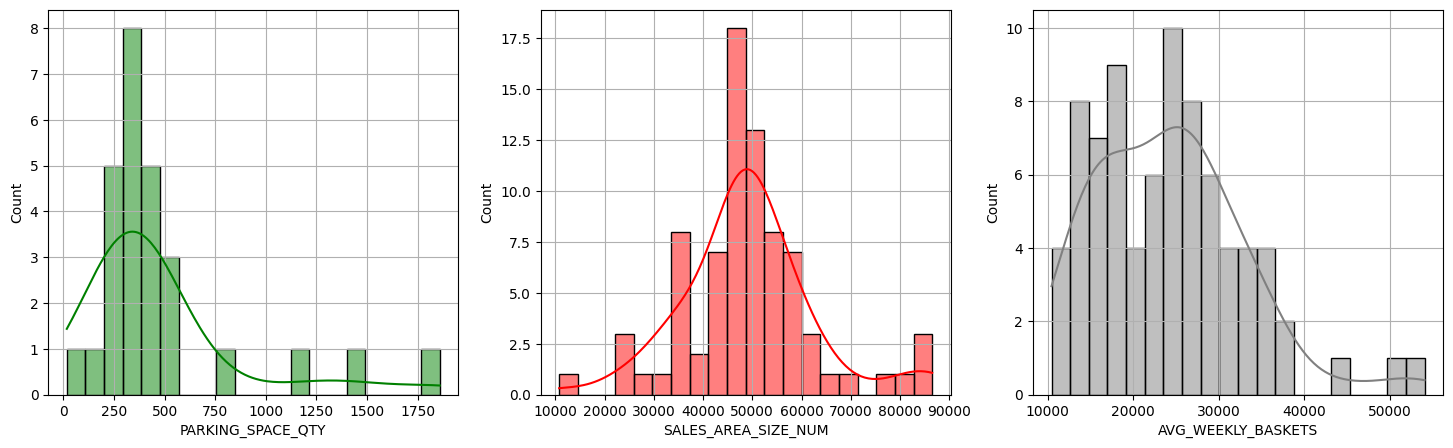

In [ ]:
# Histograms for transaction data
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

sbn.histplot(x=store['PARKING_SPACE_QTY'], kde=True, bins=20, ax=ax[0], color='green')
ax[0].grid(True)
sbn.histplot(x=store['SALES_AREA_SIZE_NUM'], kde=True, bins=20, ax=ax[1], color='red')
ax[1].grid(True)
sbn.histplot(x=store['AVG_WEEKLY_BASKETS'], kde=True, bins=20, ax=ax[2], color='gray')
ax[2].grid(True)

### Data Preprocessing

##### Duplicate Records Remoal & Replace

In [5]:
fig1 = px.box(store, x='SEG_VALUE_NAME', y='SALES_AREA_SIZE_NUM', color='SEG_VALUE_NAME',
              category_orders={'SEG_VALUE_NAME': ['VALUE', 'MAINSTREAM', 'UPSCALE']}, title='SALES_AREA_SIZE_NUM Boxplot',height=400,width=600)
fig1.update_layout(yaxis=dict(showgrid=True, gridwidth=1, gridcolor='lightgrey'))
fig1.show()

fig2 = px.box(store, x='SEG_VALUE_NAME', y='AVG_WEEKLY_BASKETS', color='SEG_VALUE_NAME',
              category_orders={'SEG_VALUE_NAME': ['VALUE', 'MAINSTREAM', 'UPSCALE']}, title='AVG_WEEKLY_BASKETS Boxplot',height=400,width=600)
fig2.update_layout(yaxis=dict(showgrid=True, gridwidth=1, gridcolor='lightgrey'))
fig2.show()

In [6]:
# Remove store record with duplicate STORE_ID
store.drop([54,61], inplace=True)
print("Duplicate STORE_ID: ", sum(store['STORE_ID'].duplicated()))

Duplicate STORE_ID:  0


In [7]:
# Replace duplicate STORE_NAME for better idenification
store.loc[8, 'STORE_NAME'] = 'HOUSTON_23237'
store.loc[12, 'STORE_NAME'] = 'HOUSTON_623'
store.loc[20, 'STORE_NAME'] = 'HOUSTON_21485'
store.loc[23, 'STORE_NAME'] = 'HOUSTON_2513'
store.loc[55, 'STORE_NAME'] = 'MIDDLETOWN_21221'
store.loc[78, 'STORE_NAME'] = 'MIDDLETOWN_28909'
store.loc[[8,12,20,23,55,78]]

# Save the updated store records to excel file
#store.to_excel('Dataset/Store Details.xlsx', index=False)

STORE_ID        STORE_NAME ADDRESS_CITY_NAME ADDRESS_STATE_PROV_CODE  \
8      23327     HOUSTON_23237           HOUSTON                      TX   
12       623       HOUSTON_623           HOUSTON                      TX   
20     21485     HOUSTON_21485              KATY                      TX   
23      2513      HOUSTON_2513           HOUSTON                      TX   
55     21221  MIDDLETOWN_21221        MIDDLETOWN                      OH   
78     28909  MIDDLETOWN_28909        MIDDLETOWN                      OH   

    MSA_CODE SEG_VALUE_NAME  PARKING_SPACE_QTY  SALES_AREA_SIZE_NUM  \
8      26420     MAINSTREAM                NaN                50722   
12     26420     MAINSTREAM                NaN                46930   
20     26420     MAINSTREAM                NaN                46369   
23     26420        UPSCALE                NaN                61833   
55     17140          VALUE                NaN                48128   
78     17140     MAINSTREAM                NaN                85876   

    AVG_WEEKLY_BASKETS  
8         30258.173077  
12        36740.692308  
20        26472.237179  
23        32422.993590  
55        17009.897436  
78        28986.108974

##### Data Integration

In [8]:
# Rename column before merging
transaction.rename(columns={'STORE_NUM': 'STORE_ID'}, inplace=True)

# Merge transaction with product data based on UPC
transaction_product_data = pd.merge(transaction, product, on='UPC', how='inner')

# Merge transaction_product_data with store data based on Store_ID
transaction_product_store_data = pd.merge(transaction_product_data, store, on='STORE_ID', how='inner')

# Sort the merged DataFrame by 'WEEK_END_DATE', 'STORE_ID', and 'UPC'
transaction_product_store_data.sort_values(by=['WEEK_END_DATE', 'STORE_ID', 'UPC'], inplace=True)
transaction_product_store_data.reset_index(drop=True, inplace=True)

transaction_product_store_data.shape

(524950, 25)

##### Attribute Rename

In [9]:
transaction_product_store_data.rename(columns={'UNITS': 'UNIT_SALES','SPEND': 'REVENUE', 'AVG_WEEKLY_BASKETS': 'AVG_WEEKLY_SALES'}, inplace=True)
transaction_product_store_data

WEEK_END_DATE  STORE_ID          UPC  UNIT_SALES  VISITS  HHS  REVENUE  \
0         2009-01-14       367   1111009477          13      13   13    18.07   
1         2009-01-14       367   1111009497          20      18   18    27.80   
2         2009-01-14       367   1111009507          14      14   14    19.32   
3         2009-01-14       367   1111035398           4       3    3    14.00   
4         2009-01-14       367   1111038078           3       3    3     7.50   
...              ...       ...          ...         ...     ...  ...      ...   
524945    2012-01-04     29159  31254742735           1       1    1     4.97   
524946    2012-01-04     29159  31254742835           5       5    5    24.85   
524947    2012-01-04     29159  88491201426          32      29   23   105.92   
524948    2012-01-04     29159  88491201427          30      26   23    99.30   
524949    2012-01-04     29159  88491212971          20      20   20    44.40   

        PRICE  BASE_PRICE  FEATURE  ...              SUB_CATEGORY  \
0        1.39        1.57        0  ...                  PRETZELS   
1        1.39        1.39        0  ...                  PRETZELS   
2        1.38        1.38        0  ...                  PRETZELS   
3        3.50        4.49        0  ...  MOUTHWASHES (ANTISEPTIC)   
4        2.50        2.50        0  ...  MOUTHWASHES (ANTISEPTIC)   
...       ...         ...      ...  ...                       ...   
524945   4.97        4.97        0  ...  MOUTHWASHES (ANTISEPTIC)   
524946   4.97        4.97        0  ...  MOUTHWASHES (ANTISEPTIC)   
524947   3.31        3.31        0  ...              ADULT CEREAL   
524948   3.31        3.31        0  ...              ADULT CEREAL   
524949   2.22        2.85        0  ...               KIDS CEREAL   

        PRODUCT_SIZE      STORE_NAME ADDRESS_CITY_NAME  \
0              15 OZ  15TH & MADISON         COVINGTON   
1              15 OZ  15TH & MADISON         COVINGTON   
2              15 OZ  15TH & MADISON         COVINGTON   
3             1.5 LT  15TH & MADISON         COVINGTON   
4             500 ML  15TH & MADISON         COVINGTON   
...              ...             ...               ...   
524945          1 LT      CARROLLTON        CARROLLTON   
524946          1 LT      CARROLLTON        CARROLLTON   
524947         18 OZ      CARROLLTON        CARROLLTON   
524948         18 OZ      CARROLLTON        CARROLLTON   
524949         11 OZ      CARROLLTON        CARROLLTON   

       ADDRESS_STATE_PROV_CODE MSA_CODE SEG_VALUE_NAME PARKING_SPACE_QTY  \
0                           KY    17140          VALUE             196.0   
1                           KY    17140          VALUE             196.0   
2                           KY    17140          VALUE             196.0   
3                           KY    17140          VALUE             196.0   
4                           KY    17140          VALUE             196.0   
...                        ...      ...            ...               ...   
524945                      TX    19100     MAINSTREAM               NaN   
524946                      TX    19100     MAINSTREAM               NaN   
524947                      TX    19100     MAINSTREAM               NaN   
524948                      TX    19100     MAINSTREAM               NaN   
524949                      TX    19100     MAINSTREAM               NaN   

       SALES_AREA_SIZE_NUM AVG_WEEKLY_SALES  
0                    24721     12706.532051  
1                    24721     12706.532051  
2                    24721     12706.532051  
3                    24721     12706.532051  
4                    24721     12706.532051  
...                    ...              ...  
524945               54927     25916.532051  
524946               54927     25916.532051  
524947               54927     25916.532051  
524948               54927     25916.532051  
524949               54927     25916.532051  

[524950 rows x 25 columns]

##### Missing Values Imputation (PRICE & BASE_PRICE)

In [10]:
# Create a copy of merged dataset called fmcg_sales_data
fmcg_sales_data = transaction_product_store_data.copy()

In [11]:
# Identify missing values in fmcg_sales_data
fmcg_sales_data.isnull().sum()

WEEK_END_DATE                   0
STORE_ID                        0
UPC                             0
UNIT_SALES                      0
VISITS                          0
HHS                             0
REVENUE                         0
PRICE                          23
BASE_PRICE                    185
FEATURE                         0
DISPLAY                         0
TPR_ONLY                        0
DESCRIPTION                     0
MANUFACTURER                    0
CATEGORY                        0
SUB_CATEGORY                    0
PRODUCT_SIZE                    0
STORE_NAME                      0
ADDRESS_CITY_NAME               0
ADDRESS_STATE_PROV_CODE         0
MSA_CODE                        0
SEG_VALUE_NAME                  0
PARKING_SPACE_QTY          359155
SALES_AREA_SIZE_NUM             0
AVG_WEEKLY_SALES                0
dtype: int64

In [18]:
# Check for common rows with missing values in both PRICE and BASE_PRICE
len(fmcg_sales_data[fmcg_sales_data['PRICE'].isnull() & fmcg_sales_data['BASE_PRICE'].isnull()])

0

In [19]:
# Rows with missing values in PRICE
fmcg_sales_data[fmcg_sales_data['PRICE'].isnull()]

WEEK_END_DATE  STORE_ID          UPC  UNIT_SALES  VISITS  HHS  REVENUE  \
21195     2009-02-25     25001   1111038078           1       1    1      0.0   
21196     2009-02-25     25001   1111038080           1       1    1      0.0   
25835     2009-03-11     11761   1111087396           1       1    1      0.0   
64525     2009-06-03     23055   3700019521           1       1    1      0.0   
66221     2009-06-10      6187  31254742835           0       2    2      0.0   
150740    2009-12-02     28909  31254742735           0       2    2      0.0   
152090    2009-12-09     11967  31254742735           0       2    1      0.0   
181398    2010-02-10       389   3700019521           0       2    2      0.0   
200559    2010-03-17     21485   1111035398           1       1    1      0.0   
224231    2010-05-05     19523   3700044982           1       1    1      0.0   
251133    2010-06-30     11967   7218063052           1       1    1      0.0   
264841    2010-07-28     11757   3700044982           1       1    1      0.0   
267366    2010-08-04      2279   4116709565           1       1    1      0.0   
280522    2010-08-25     25229   2066200530           1       1    1      0.0   
282614    2010-09-01     13859   7218063979           1       1    1      0.0   
304180    2010-10-13     19533   7218063983           1       1    1      0.0   
323980    2010-11-24      6431   7797508006           2       1    1      0.0   
325502    2010-11-24     21485   2840002333           1       1    1      0.0   
373945    2011-03-02     19521   3000006610           0       6    5      0.0   
398344    2011-04-20     17599   7192100339           1       1    1      0.0   
445388    2011-07-20     29159  31254742835           1       1    1      0.0   
452466    2011-08-10       623   4116709428           1       1    1      0.0   
481806    2011-10-05     25021   3000006610           1       1    1      0.0   

        PRICE  BASE_PRICE  FEATURE  DISPLAY  TPR_ONLY  \
21195     NaN        2.59        0        0         0   
21196     NaN        2.59        0        0         0   
25835     NaN        3.87        0        0         0   
64525     NaN        3.49        0        0         0   
66221     NaN        4.99        0        0         0   
150740    NaN        4.99        0        0         0   
152090    NaN        4.79        0        0         0   
181398    NaN        3.49        0        0         0   
200559    NaN        3.17        0        0         0   
224231    NaN        5.69        0        0         0   
251133    NaN        7.29        0        0         0   
264841    NaN        5.49        0        0         0   
267366    NaN        4.99        0        0         0   
280522    NaN        5.99        0        0         0   
282614    NaN        6.49        0        0         0   
304180    NaN        7.29        0        0         0   
323980    NaN        2.99        0        0         0   
325502    NaN        2.89        0        0         0   
373945    NaN        2.98        0        0         0   
398344    NaN        6.59        0        0         0   
445388    NaN        4.83        0        0         0   
452466    NaN        4.59        0        0         0   
481806    NaN        3.09        0        0         0   

                      DESCRIPTION   MANUFACTURER               CATEGORY  \
21195    PL BL MINT ANTSPTC RINSE  PRIVATE LABEL  ORAL HYGIENE PRODUCTS   
21196    PL ANTSPTC SPG MNT MTHWS  PRIVATE LABEL  ORAL HYGIENE PRODUCTS   
25835    PL SR CRUST 3 MEAT PIZZA  PRIVATE LABEL           FROZEN PIZZA   
64525   CREST PH WHTG CLN MINT TP          P & G  ORAL HYGIENE PRODUCTS   
66221   LSTRNE FRS BRST ANTSPC MW         WARNER  ORAL HYGIENE PRODUCTS   
150740  LSTRNE CL MINT ANTSPTC MW         WARNER  ORAL HYGIENE PRODUCTS   
152090  LSTRNE CL MINT ANTSPTC MW         WARNER  ORAL HYGIENE PRODUCTS   
181398  CREST PH WHTG CLN MINT TP          P & G  ORAL HYGIENE PRODUCTS   
200559   PL BL MIN

In [20]:
# Examine if both PRICE and BASE_PRICE are same for other instances when FEATURE, DISPLAY, TPR_ONLY are 0
fmcg_sales_data[(fmcg_sales_data['FEATURE'] == 0) & (fmcg_sales_data['DISPLAY'] == 0) & (fmcg_sales_data['TPR_ONLY'] == 0)]

WEEK_END_DATE  STORE_ID          UPC  UNIT_SALES  VISITS  HHS  REVENUE  \
1         2009-01-14       367   1111009497          20      18   18    27.80   
2         2009-01-14       367   1111009507          14      14   14    19.32   
4         2009-01-14       367   1111038078           3       3    3     7.50   
5         2009-01-14       367   1111038080           2       2    2     5.18   
6         2009-01-14       367   1111085319          14      13   13    26.32   
...              ...       ...          ...         ...     ...  ...      ...   
524944    2012-01-04     29159  31254742725           3       3    3    13.68   
524945    2012-01-04     29159  31254742735           1       1    1     4.97   
524946    2012-01-04     29159  31254742835           5       5    5    24.85   
524947    2012-01-04     29159  88491201426          32      29   23   105.92   
524948    2012-01-04     29159  88491201427          30      26   23    99.30   

        PRICE  BASE_PRICE  FEATURE  DISPLAY  TPR_ONLY  \
1        1.39        1.39        0        0         0   
2        1.38        1.38        0        0         0   
4        2.50        2.50        0        0         0   
5        2.59        2.59        0        0         0   
6        1.88        1.88        0        0         0   
...       ...         ...      ...      ...       ...   
524944   4.56        4.56        0        0         0   
524945   4.97        4.97        0        0         0   
524946   4.97        4.97        0        0         0   
524947   3.31        3.31        0        0         0   
524948   3.31        3.31        0        0         0   

                      DESCRIPTION   MANUFACTURER               CATEGORY  \
1               PL PRETZEL STICKS  PRIVATE LABEL             BAG SNACKS   
2               PL TWIST PRETZELS  PRIVATE LABEL             BAG SNACKS   
4        PL BL MINT ANTSPTC RINSE  PRIVATE LABEL  ORAL HYGIENE PRODUCTS   
5        PL ANTSPTC SPG MNT MTHWS  PRIVATE LABEL  ORAL HYGIENE PRODUCTS   
6        PL HONEY NUT TOASTD OATS  PRIVATE LABEL            COLD CEREAL   
...                           ...            ...                    ...   
524944  LSTRNE CL MINT ANTSPTC MW         WARNER  ORAL HYGIENE PRODUCTS   
524945  LSTRNE CL MINT ANTSPTC MW         WARNER  ORAL HYGIENE PRODUCTS   
524946  LSTRNE FRS BRST ANTSPC MW         WARNER  ORAL HYGIENE PRODUCTS   
524947   POST HNY BN OTS HNY RSTD     POST FOODS            COLD CEREAL   
524948  POST FM SZ HNYBNCH OT ALM     POST FOODS            COLD CEREAL   

                    SUB_CATEGORY PRODUCT_SIZE      STORE_NAME  \
1                       PRETZELS        15 OZ  15TH & MADISON   
2                       PRETZELS        15 OZ  15TH & MADISON   
4       MOUTHWASHES (ANTISEPTIC)       500 ML  15TH & MADISON   
5       MOUTHWASHES (ANTISEPTIC)       500 ML  15TH & MADISON   
6              ALL FAMILY CEREAL     12.25 OZ  15TH & MADISON   
...                          ...          ...             ...   
524944  MOUTHWASHES (ANTISEPTIC)       500 ML      CARROLLTON   
524945  MOUTHWASHES (ANTISEPTIC)         1 LT      CARROLLTON   
524946  MOUTHWASHES (ANTISEPTIC)         1 LT      CARROLLTON   
524947              ADULT CEREAL        18 OZ      CARROLLTON   
524948              ADULT CEREAL        18 OZ      CARROLLTON   

       ADDRESS_CITY_NAME ADDRESS_STATE_PROV_CODE  MSA_CODE SEG_VALUE_NAME  \
1              COVINGTON                      KY     17140          VALUE   
2              COVINGTON                      KY     17140          VALUE   
4              COVINGTON                      KY     17140          VALUE   
5              COVINGTON                      KY     17140          VALUE   
6              COVINGTON                      KY     17140          VALUE   
...                  ...                     ...       ...            ...   
524944        CARROLLTON                      TX     19100     MAINSTREAM   
524945        CARROLLTON                      TX   

In [12]:
# Impute missing values in PRICE with the same value as BASE_PRICE
fmcg_sales_data['PRICE'].fillna(fmcg_sales_data['BASE_PRICE'], inplace=True)

# Recalculate REVENUE based on PRICE and UNIT_SALES
fmcg_sales_data['REVENUE'] = fmcg_sales_data['PRICE'] * fmcg_sales_data['UNIT_SALES']

# Check top 3 rows after PRICE imputation
fmcg_sales_data.iloc[['21195', '21196', '25835']]

WEEK_END_DATE  STORE_ID         UPC  UNIT_SALES  VISITS  HHS  REVENUE  \
21195    2009-02-25     25001  1111038078           1       1    1     2.59   
21196    2009-02-25     25001  1111038080           1       1    1     2.59   
25835    2009-03-11     11761  1111087396           1       1    1     3.87   

       PRICE  BASE_PRICE  FEATURE  ...              SUB_CATEGORY  \
21195   2.59        2.59        0  ...  MOUTHWASHES (ANTISEPTIC)   
21196   2.59        2.59        0  ...  MOUTHWASHES (ANTISEPTIC)   
25835   3.87        3.87        0  ...             PIZZA/PREMIUM   

       PRODUCT_SIZE      STORE_NAME ADDRESS_CITY_NAME ADDRESS_STATE_PROV_CODE  \
21195        500 ML        PINEWOOD            DAYTON                      OH   
21196        500 ML        PINEWOOD            DAYTON                      OH   
25835       30.5 OZ  MIAMI TOWNSHIP          LOVELAND                      OH   

      MSA_CODE SEG_VALUE_NAME PARKING_SPACE_QTY SALES_AREA_SIZE_NUM  \
21195    19380          VALUE             351.0               34177   
21196    19380          VALUE             351.0               34177   
25835    17140        UPSCALE               NaN               53905   

      AVG_WEEKLY_SALES  
21195     18034.967949  
21196     18034.967949  
25835     23348.064103  

[3 rows x 25 columns]

In [22]:
# Rows with missing values in BASE_PRICE
fmcg_sales_data[fmcg_sales_data['BASE_PRICE'].isnull()]

WEEK_END_DATE  STORE_ID         UPC  UNIT_SALES  VISITS  HHS  REVENUE  \
542       2009-01-14      4245  1111087395          56      46   46   185.92   
543       2009-01-14      4245  1111087396          38      30   30   126.16   
544       2009-01-14      4245  1111087398          72      53   53   238.32   
590       2009-01-14      4259  1111087395          52      43   43   173.16   
592       2009-01-14      4259  1111087398          52      39   38   176.28   
...              ...       ...         ...         ...     ...  ...      ...   
469329    2011-09-14      2279  2066200531          12      10   10    59.88   
470723    2011-09-14     15541  2066200531           7       6    6    34.93   
482337    2011-10-12       367  2840002333           2       2    2     6.58   
490628    2011-10-26     15755  3700019521           1       1    1     2.49   
496606    2011-11-09     10019  7218063983           2       2    2     9.98   

        PRICE  BASE_PRICE  FEATURE  DISPLAY  TPR_ONLY  \
542      3.32         NaN        0        1         0   
543      3.32         NaN        0        1         0   
544      3.31         NaN        0        1         0   
590      3.33         NaN        0        1         0   
592      3.39         NaN        0        1         0   
...       ...         ...      ...      ...       ...   
469329   4.99         NaN        0        1         0   
470723   4.99         NaN        0        1         0   
482337   3.29         NaN        0        1         0   
490628   2.49         NaN        1        0         0   
496606   4.99         NaN        1        0         0   

                      DESCRIPTION   MANUFACTURER               CATEGORY  \
542       PL SR CRUST SUPRM PIZZA  PRIVATE LABEL           FROZEN PIZZA   
543      PL SR CRUST 3 MEAT PIZZA  PRIVATE LABEL           FROZEN PIZZA   
544      PL SR CRUST PEPPRN PIZZA  PRIVATE LABEL           FROZEN PIZZA   
590       PL SR CRUST SUPRM PIZZA  PRIVATE LABEL           FROZEN PIZZA   
592      PL SR CRUST PEPPRN PIZZA  PRIVATE LABEL           FROZEN PIZZA   
...                           ...            ...                    ...   
469329    NWMN OWN 4 CHEESE PIZZA           KING           FROZEN PIZZA   
470723    NWMN OWN 4 CHEESE PIZZA           KING           FROZEN PIZZA   
482337   RLDGLD BRAIDED HONEY WHT      FRITO LAY             BAG SNACKS   
490628  CREST PH WHTG CLN MINT TP          P & G  ORAL HYGIENE PRODUCTS   
496606        FRSC 4 CHEESE PIZZA          TONYS           FROZEN PIZZA   

                       SUB_CATEGORY PRODUCT_SIZE           STORE_NAME  \
542                   PIZZA/PREMIUM      32.7 OZ         LAWRENCEBURG   
543                   PIZZA/PREMIUM      30.5 OZ         LAWRENCEBURG   
544                   PIZZA/PREMIUM      29.6 OZ         LAWRENCEBURG   
590                   PIZZA/PREMIUM      32.7 OZ        WARSAW AVENUE   
592                   PIZZA/PREMIUM      29.6 OZ        WARSAW AVENUE   
...                             ...          ...                  ...   
469329                PIZZA/PREMIUM      13.3 OZ     MILFORD-MULBERRY   
470723                PIZZA/PREMIUM      13.3 OZ             LOVELAND   
482337                     PRETZELS        10 OZ       15TH & MADISON   
490628  MOUTHWASH/RINSES AND SPRAYS       4.2 OZ  KROGER JUNCTION S/C   
496606                PIZZA/PREMIUM     26.11 OZ       AT EASTEX FRWY   

       ADDRESS_CITY_NAME ADDRESS_STATE_PROV_CODE  MSA_CODE SEG_VALUE_NAME  \
542         LAWRENCEBURG                      IN     17140     MAINSTREAM   
543         LAWRENCEBURG                      IN     17140     MAINSTREAM   
544         LAWRENCEBURG                      IN     17140     MAINSTREAM   
590           CINCINNATI                      OH     17140          VALUE   
592           CINCINNATI                      OH     17140          VALUE   
...                  ...                     ...       ...            ...   
469329           MILFORD                    

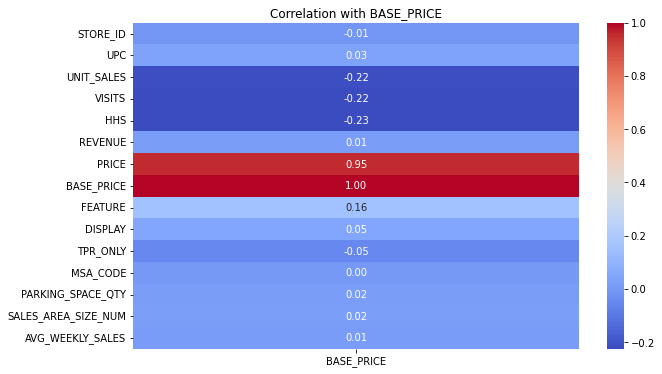

In [23]:
numeric_data = fmcg_sales_data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 6))
sbn.heatmap(numeric_data.corr()[['BASE_PRICE']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation with BASE_PRICE')
plt.show()

In [34]:
base_price_median_by_price = fmcg_sales_data.groupby('PRICE')['BASE_PRICE'].median().reset_index()
base_price_median_by_price.columns = ['PRICE', 'MEDIAN_BASE_PRICE']
base_price_median_by_price
print(base_price_median_by_price[base_price_median_by_price['PRICE'] == 2.18])
print(base_price_median_by_price[base_price_median_by_price['PRICE'] == 1.99])

     PRICE  MEDIAN_BASE_PRICE
158   2.18               2.89
     PRICE  MEDIAN_BASE_PRICE
139   1.99               2.66


In [13]:
# Impute missing values in BASE_PRICE with the median of BASE_PRICE by corresponding PRICE values
fmcg_sales_data['BASE_PRICE'].fillna(fmcg_sales_data.groupby('PRICE')['BASE_PRICE'].transform('median'), inplace=True)

# Check top 3 rows after BASE_PRICE imputation
fmcg_sales_data.iloc[['542', '543', '544']]

WEEK_END_DATE  STORE_ID         UPC  UNIT_SALES  VISITS  HHS  REVENUE  \
542    2009-01-14      4245  1111087395          56      46   46   185.92   
543    2009-01-14      4245  1111087396          38      30   30   126.16   
544    2009-01-14      4245  1111087398          72      53   53   238.32   

     PRICE  BASE_PRICE  FEATURE  ...   SUB_CATEGORY  PRODUCT_SIZE  \
542   3.32        3.32        0  ...  PIZZA/PREMIUM       32.7 OZ   
543   3.32        3.32        0  ...  PIZZA/PREMIUM       30.5 OZ   
544   3.31        3.31        0  ...  PIZZA/PREMIUM       29.6 OZ   

       STORE_NAME ADDRESS_CITY_NAME ADDRESS_STATE_PROV_CODE MSA_CODE  \
542  LAWRENCEBURG      LAWRENCEBURG                      IN    17140   
543  LAWRENCEBURG      LAWRENCEBURG                      IN    17140   
544  LAWRENCEBURG      LAWRENCEBURG                      IN    17140   

    SEG_VALUE_NAME PARKING_SPACE_QTY SALES_AREA_SIZE_NUM AVG_WEEKLY_SALES  
542     MAINSTREAM               NaN               58563     19274.673077  
543     MAINSTREAM               NaN               58563     19274.673077  
544     MAINSTREAM               NaN               58563     19274.673077  

[3 rows x 25 columns]

##### Missing Values Removal (Drop PARKING_SPACE_QTY)

In [14]:
fmcg_sales_data.drop(columns=['PARKING_SPACE_QTY'], inplace=True)

##### Data Filtering (Removing Invalid Transaction Records)

In [15]:
invalid_rows = fmcg_sales_data[(fmcg_sales_data['PRICE'] == 0) | (fmcg_sales_data['UNIT_SALES'] == 0)]
invalid_rows

WEEK_END_DATE  STORE_ID          UPC  UNIT_SALES  VISITS  HHS  REVENUE  \
66221     2009-06-10      6187  31254742835           0       2    2      0.0   
150740    2009-12-02     28909  31254742735           0       2    2      0.0   
152090    2009-12-09     11967  31254742735           0       2    1      0.0   
181398    2010-02-10       389   3700019521           0       2    2      0.0   
246398    2010-06-23       367   7027316404           3       3    3      0.0   
373945    2011-03-02     19521   3000006610           0       6    5      0.0   

        PRICE  BASE_PRICE  FEATURE  ...               CATEGORY  \
66221    4.99        4.99        0  ...  ORAL HYGIENE PRODUCTS   
150740   4.99        4.99        0  ...  ORAL HYGIENE PRODUCTS   
152090   4.79        4.79        0  ...  ORAL HYGIENE PRODUCTS   
181398   3.49        3.49        0  ...  ORAL HYGIENE PRODUCTS   
246398   0.00        1.97        0  ...             BAG SNACKS   
373945   2.98        2.98        0  ...            COLD CEREAL   

                       SUB_CATEGORY PRODUCT_SIZE        STORE_NAME  \
66221      MOUTHWASHES (ANTISEPTIC)         1 LT         ST. MARYS   
150740     MOUTHWASHES (ANTISEPTIC)         1 LT  MIDDLETOWN_28909   
152090     MOUTHWASHES (ANTISEPTIC)         1 LT   NORTHBOROUGH SQ   
181398  MOUTHWASH/RINSES AND SPRAYS       4.2 OZ        SILVERLAKE   
246398                     PRETZELS        16 OZ    15TH & MADISON   
373945                  KIDS CEREAL        14 OZ         SOUTHLAKE   

       ADDRESS_CITY_NAME ADDRESS_STATE_PROV_CODE MSA_CODE SEG_VALUE_NAME  \
66221        SAINT MARYS                      OH    47540     MAINSTREAM   
150740        MIDDLETOWN                      OH    17140     MAINSTREAM   
152090           HOUSTON                      TX    26420          VALUE   
181398          ERLANGER                      KY    17140     MAINSTREAM   
246398         COVINGTON                      KY    17140          VALUE   
373945         SOUTHLAKE                      TX    19100        UPSCALE   

       SALES_AREA_SIZE_NUM AVG_WEEKLY_SALES  
66221                55474     20015.320513  
150740               85876     28986.108974  
152090               25072     15915.743590  
181398               46073     24766.807692  
246398               24721     12706.532051  
373945               47757     14051.608974  

[6 rows x 24 columns]

In [16]:
# Filter data where instances have either 'UNIT_SALES' or 'PRICE' equals 0
fmcg_sales_data.drop(invalid_rows.index, inplace=True)
fmcg_sales_data.shape

(524944, 24)

##### Data Transformation

In [42]:
temp = fmcg_sales_data[(fmcg_sales_data['UNIT_SALES'] > 0) & (fmcg_sales_data['UNIT_SALES'] < 1)]
print("UNIT_SALES: ", "False" if temp.empty else "True")

temp = fmcg_sales_data[(fmcg_sales_data['VISITS'] > 0) & (fmcg_sales_data['VISITS'] < 1)]
print("VISITS: ", "False" if temp.empty else "True")

temp = fmcg_sales_data[(fmcg_sales_data['HHS'] > 0) & (fmcg_sales_data['HHS'] < 1)]
print("HHS: ", "False" if temp.empty else "True")

temp = fmcg_sales_data[(fmcg_sales_data['REVENUE'] > 0) & (fmcg_sales_data['REVENUE'] < 1)]
print("REVENUE: ", "False" if temp.empty else "True")

UNIT_SALES:  False
VISITS:  False
HHS:  False
REVENUE:  True


In [17]:
# Log Transformation
fmcg_sales_data['UNIT_SALES_LOG'] = np.log(fmcg_sales_data['UNIT_SALES'])
fmcg_sales_data['VISITS_LOG'] = np.log(fmcg_sales_data['VISITS'])
fmcg_sales_data['HHS_LOG'] = np.log(fmcg_sales_data['HHS'])
fmcg_sales_data['REVENUE_LOG'] = np.log(fmcg_sales_data['REVENUE'] + 1)   # Add constant 1 to avoid negative value of REVENUE_LOG

In [44]:
print(fmcg_sales_data['UNIT_SALES_LOG'].skew())
print(fmcg_sales_data['VISITS_LOG'].skew())
print(fmcg_sales_data['HHS_LOG'].skew())
print(fmcg_sales_data['REVENUE_LOG'].skew())

-0.06732377963539328
-0.04529651421386215
-0.03564056157874972
-0.025991084631762286


In [18]:
# Square Root Transformation
fmcg_sales_data['PRICE_SQRT'] = np.sqrt(fmcg_sales_data['PRICE'])
fmcg_sales_data['BASE_PRICE_SQRT'] = np.sqrt(fmcg_sales_data['BASE_PRICE'])
fmcg_sales_data['AVG_WEEKLY_SALES_SQRT'] = np.sqrt(fmcg_sales_data['AVG_WEEKLY_SALES'])

In [46]:
print(fmcg_sales_data['PRICE_SQRT'].skew())
print(fmcg_sales_data['BASE_PRICE_SQRT'].skew())
print(fmcg_sales_data['AVG_WEEKLY_SALES_SQRT'].skew())

0.29621804479007097
0.32239588368775085
0.3762852191019034


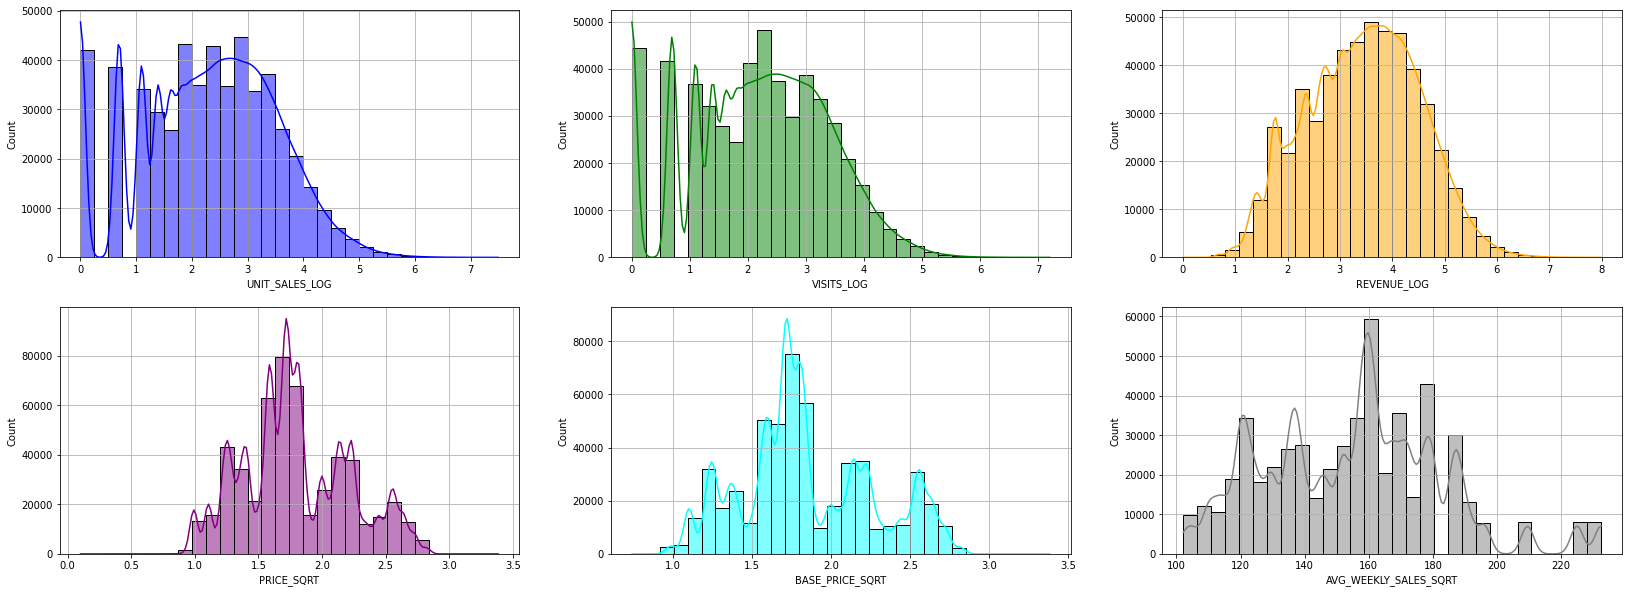

In [47]:
# Plot histogram  for log and sqrt transformed variables
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(28, 10))

sbn.histplot(x=fmcg_sales_data['UNIT_SALES_LOG'], kde=True, bins=30, ax=ax[0,0], color='blue')
ax[0,0].grid(True)
sbn.histplot(x=fmcg_sales_data['VISITS_LOG'], kde=True, bins=30, ax=ax[0,1], color='green')
ax[0,1].grid(True)
sbn.histplot(x=fmcg_sales_data['REVENUE_LOG'], kde=True, bins=30, ax=ax[0,2], color='orange')
ax[0,2].grid(True)

sbn.histplot(x=fmcg_sales_data['PRICE_SQRT'], kde=True, bins=30, ax=ax[1,0], color='purple')
ax[1,0].grid(True)
sbn.histplot(x=fmcg_sales_data['BASE_PRICE_SQRT'], kde=True, bins=30, ax=ax[1,1], color='cyan')
ax[1,1].grid(True)
sbn.histplot(x=fmcg_sales_data['AVG_WEEKLY_SALES_SQRT'], kde=True, bins=30, ax=ax[1,2], color='gray')
ax[1,2].grid(True)

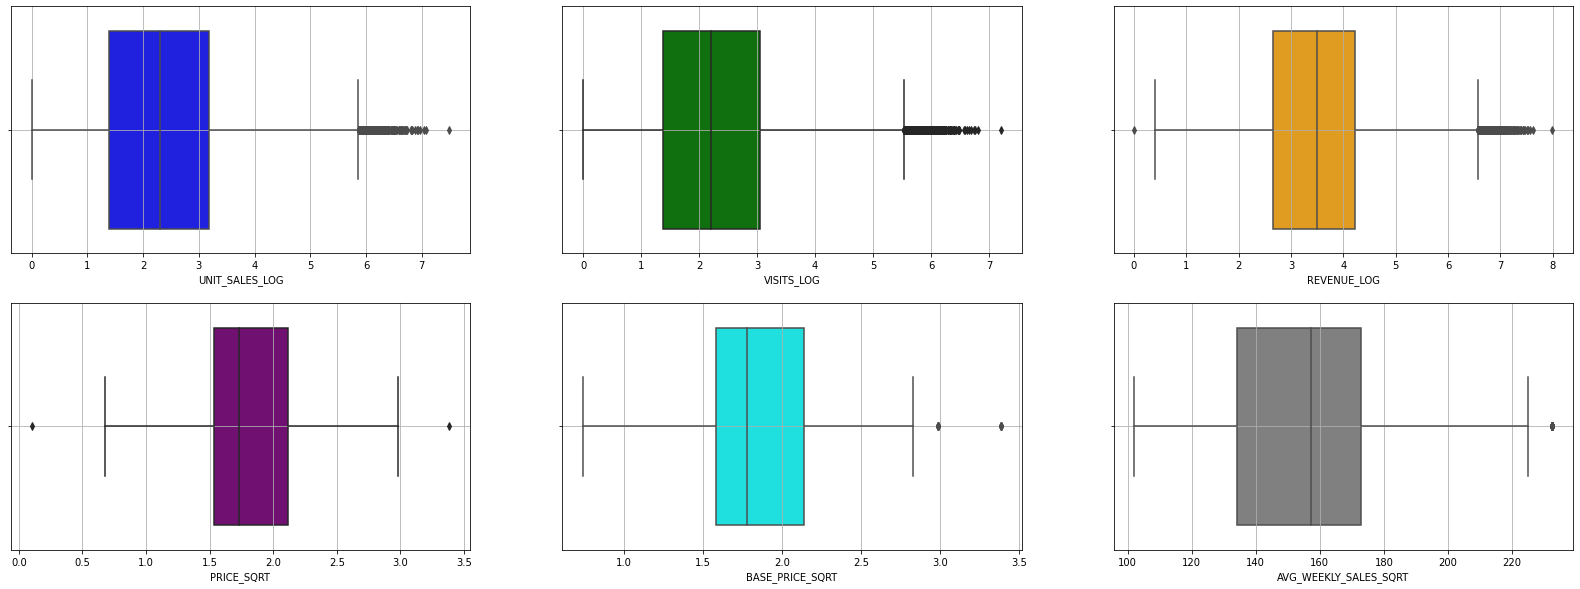

In [48]:
# Plot boxplot for log and sqrt transformed variables
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(28, 10))

sbn.boxplot(x=fmcg_sales_data['UNIT_SALES_LOG'], ax=ax[0,0], color='blue')
ax[0,0].grid(True)
sbn.boxplot(x=fmcg_sales_data['VISITS_LOG'], ax=ax[0,1], color='green')
ax[0,1].grid(True)
sbn.boxplot(x=fmcg_sales_data['REVENUE_LOG'], ax=ax[0,2], color='orange')
ax[0,2].grid(True)

sbn.boxplot(x=fmcg_sales_data['PRICE_SQRT'], ax=ax[1,0], color='purple')
ax[1,0].grid(True)
sbn.boxplot(x=fmcg_sales_data['BASE_PRICE_SQRT'], ax=ax[1,1], color='cyan')
ax[1,1].grid(True)
sbn.boxplot(x=fmcg_sales_data['AVG_WEEKLY_SALES_SQRT'], ax=ax[1,2], color='gray')
ax[1,2].grid(True)

##### Feature Engineering

###### YEAR, MONTH, WEEK_NUM

In [19]:
fmcg_sales_data.insert(1,'YEAR', fmcg_sales_data['WEEK_END_DATE'].dt.year)
fmcg_sales_data.insert(2,'MONTH', fmcg_sales_data['WEEK_END_DATE'].dt.month)
fmcg_sales_data.insert(3,'WEEK_NUM', fmcg_sales_data['WEEK_END_DATE'].dt.isocalendar().week)

###### DISCOUNT_RATE

In [20]:
fmcg_sales_data.insert(12, 'DISCOUNT_RATE', (fmcg_sales_data['BASE_PRICE'] - fmcg_sales_data['PRICE']) / fmcg_sales_data['BASE_PRICE'])

In [21]:
# transaction rows with negative discount rate (price > base price)
fmcg_sales_data[fmcg_sales_data['PRICE'] > fmcg_sales_data['BASE_PRICE']].sample(5)

WEEK_END_DATE  YEAR  MONTH  WEEK_NUM  STORE_ID         UPC  UNIT_SALES  \
157420    2009-12-16  2009     12        51     27175  1111009497          57   
186122    2010-02-17  2010      2         7     13827  1111009477          50   
512663    2011-12-14  2011     12        50      6179  1111009477         147   
197148    2010-03-10  2010      3        10     21221  1111009507          27   
96045     2009-08-12  2009      8        33     13827  1111009497          74   

        VISITS  HHS  REVENUE  ...  SEG_VALUE_NAME  SALES_AREA_SIZE_NUM  \
157420      50   49    56.43  ...         UPSCALE                50224   
186122      48   48    61.50  ...      MAINSTREAM                50766   
512663     122  120   238.14  ...         UPSCALE                54448   
197148      25   25    40.23  ...           VALUE                48128   
96045       60   59    73.26  ...      MAINSTREAM                50766   

        AVG_WEEKLY_SALES  UNIT_SALES_LOG  VISITS_LOG   HHS_LOG REVENUE_LOG  \
157420      24901.948718        4.043051    3.912023  3.891820    4.050567   
186122      26000.570513        3.912023    3.871201  3.871201    4.135167   
512663      35287.974359        4.990433    4.804021  4.787492    5.477049   
197148      17009.897436        3.295837    3.218876  3.218876    3.719166   
96045       26000.570513        4.304065    4.094345  4.077537    4.307572   

       PRICE_SQRT BASE_PRICE_SQRT AVG_WEEKLY_SALES_SQRT  
157420   0.994987        0.989949            157.803513  
186122   1.109054        1.067708            161.246924  
512663   1.272792        1.216553            187.850937  
197148   1.220656        1.216553            130.421998  
96045    0.994987        0.984886            161.246924  

[5 rows x 35 columns]

###### PROMOTION_SUPPORT

In [22]:
conditions = [
    (fmcg_sales_data['FEATURE'] == 0) & (fmcg_sales_data['DISPLAY'] == 0) & (fmcg_sales_data['TPR_ONLY'] == 0),
    (fmcg_sales_data['TPR_ONLY'] == 1),
    (fmcg_sales_data['FEATURE'] == 1) | (fmcg_sales_data['DISPLAY'] == 1)
]
values = ['NONE', 'UNSUPPORTED', 'SUPPORTED']

fmcg_sales_data.insert(16, 'PROMOTION_SUPPORT', np.select(conditions, values, default='No'))

###### SEG_VALUE_NAME_ORDINAL (Ordinal Encoding of SEG_VALUE_NAME)

In [23]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[['VALUE', 'MAINSTREAM', 'UPSCALE']])  # Define the encoder
fmcg_sales_data['SEG_VALUE_NAME_ORDINAL'] = encoder.fit_transform(fmcg_sales_data[['SEG_VALUE_NAME']]) # Fit and transform the data

In [64]:
fmcg_sales_data.sample(3)[['SEG_VALUE_NAME', 'SEG_VALUE_NAME_ORDINAL']]

SEG_VALUE_NAME  SEG_VALUE_NAME_ORDINAL
229930     MAINSTREAM                     1.0
412427          VALUE                     0.0
144961        UPSCALE                     2.0

#### Data Validation after Data Preprocessing

In [35]:
# Number of rows and columns after data pre-processing
fmcg_sales_data.shape

(524944, 37)

In [34]:
fmcg_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524944 entries, 0 to 524949
Data columns (total 37 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   WEEK_END_DATE            524944 non-null  datetime64[ns]
 1   YEAR                     524944 non-null  int64         
 2   MONTH                    524944 non-null  int64         
 3   WEEK_NUM                 524944 non-null  UInt32        
 4   STORE_ID                 524944 non-null  int64         
 5   UPC                      524944 non-null  int64         
 6   UNIT_SALES               524944 non-null  int64         
 7   VISITS                   524944 non-null  int64         
 8   HHS                      524944 non-null  int64         
 9   REVENUE                  524944 non-null  float64       
 10  PRICE                    524944 non-null  float64       
 11  BASE_PRICE               524944 non-null  float64       
 12  DISCOUNT_RATE   

### Data Sampling for Modeling

#### Remove rows for UPCs less than 10,000 counts

In [36]:
upc_counts = fmcg_sales_data['UPC'].value_counts()
upc_counts_less_10k = upc_counts[upc_counts < 10000]
print('Num of rows related to UPCs with less than 10,000 transaction records: ',  upc_counts_less_10k.sum())

subset_fmcg_sales_data = fmcg_sales_data[~fmcg_sales_data['UPC'].isin(upc_counts_less_10k.index)]
subset_fmcg_sales_data.shape

Num of rows related to UPCs with less than 10,000 transaction records:  109881


(415063, 37)

#### Remove rows with UNIT_SALES > 500

In [37]:
subset_fmcg_sales_data[['UNIT_SALES']].describe().transpose()

count       mean        std  min  25%   50%   75%     max
UNIT_SALES  415063.0  22.851555  32.482429  1.0  6.0  13.0  28.0  1800.0

In [38]:
print('Num of rows with UNIT_SALES more than 500: ', len(subset_fmcg_sales_data[subset_fmcg_sales_data['UNIT_SALES'] > 500]))
subset_fmcg_sales_data = subset_fmcg_sales_data[subset_fmcg_sales_data['UNIT_SALES'] <= 500]
print(subset_fmcg_sales_data.shape)
subset_fmcg_sales_data[['UNIT_SALES']].describe().transpose()

Num of rows with UNIT_SALES more than 500:  116
(414947, 37)


count       mean        std  min  25%   50%   75%    max
UNIT_SALES  414947.0  22.673857  30.555982  1.0  6.0  13.0  28.0  500.0

#### Remove STORE_ID and UPC pairs with less than 5 transaction records

In [39]:
unique_store_upc = subset_fmcg_sales_data[['STORE_ID', 'UPC']].drop_duplicates()
counts = subset_fmcg_sales_data.groupby(['STORE_ID', 'UPC']).size().reset_index(name='Counts')
unique_store_upc = unique_store_upc.merge(counts, on=['STORE_ID', 'UPC'])

store_upc_less5 = unique_store_upc[unique_store_upc['Counts'] < 5] 
display(store_upc_less5)
print('Num of rows with STORE_ID and UPC pairs less than 5 transaction records: ',  store_upc_less5['Counts'].sum())

STORE_ID          UPC  Counts
33         387   1111038080       3
60         387  31254742725       4
2574     23055   1111038080       3

Num of rows with STORE_ID and UPC pairs less than 5 transaction records:  10


In [40]:
subset_fmcg_sales_data = subset_fmcg_sales_data[~subset_fmcg_sales_data.set_index(['STORE_ID', 'UPC']).index.
isin(store_upc_less5.set_index(['STORE_ID', 'UPC']).index)]
subset_fmcg_sales_data.shape

(414937, 37)

### Feature Selection for Modeling

<AxesSubplot:>

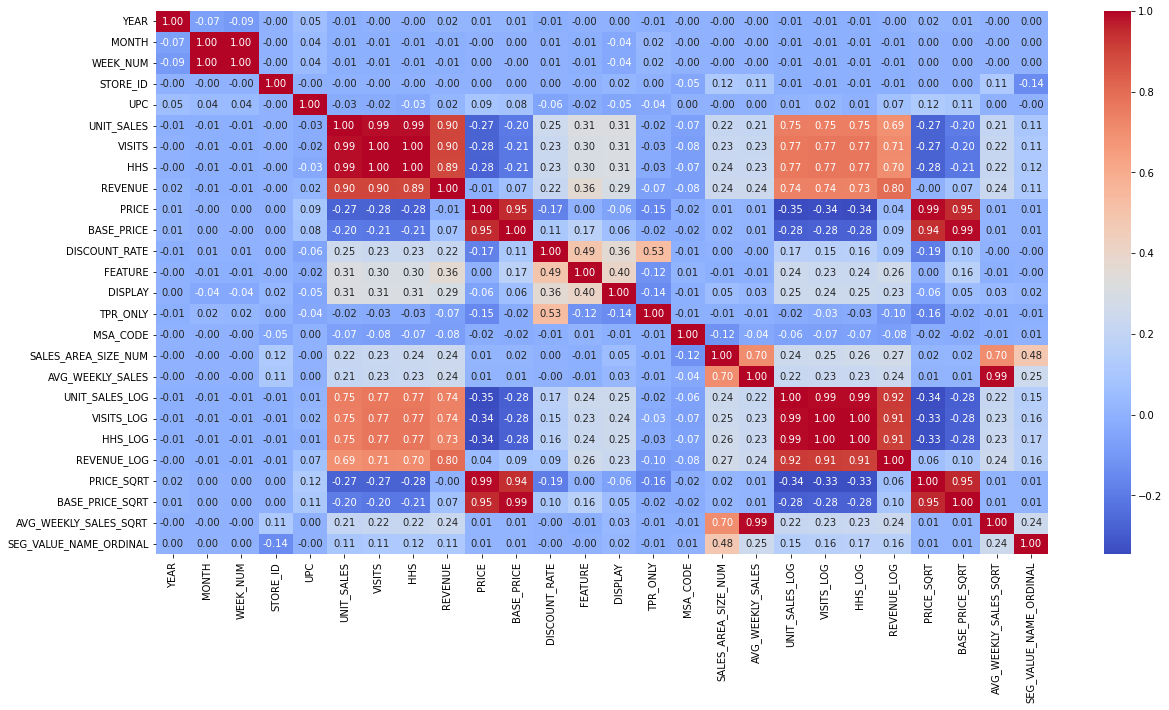

In [41]:
# Heatmap Correlation after performing all data proprocessing steps
# numeric_data = fmcg_sales_data.select_dtypes(include=['float64', 'int64', 'int32', 'UInt32'])
correlation_matrix = subset_fmcg_sales_data.corr()
plt.figure(figsize=(20,10)) 
sbn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

In [44]:
# Drop multicollinear variables with correlation = 1
subset_fmcg_sales_data.drop(columns=['MONTH','HHS','HHS_LOG'], inplace=True)

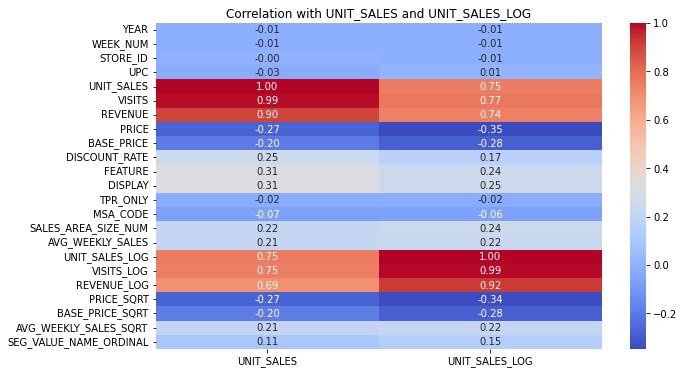

In [45]:
numeric_data = subset_fmcg_sales_data.select_dtypes(include=['float64', 'int64', 'int32', 'UInt32'])
plt.figure(figsize=(10, 6))
sbn.heatmap(numeric_data.corr()[['UNIT_SALES', 'UNIT_SALES_LOG']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation with UNIT_SALES and UNIT_SALES_LOG')
plt.show()

In [46]:
subset_fmcg_sales_data.select_dtypes(include=['object']).columns

Index(['PROMOTION_SUPPORT', 'DESCRIPTION', 'MANUFACTURER', 'CATEGORY',
       'SUB_CATEGORY', 'PRODUCT_SIZE', 'STORE_NAME', 'ADDRESS_CITY_NAME',
       'ADDRESS_STATE_PROV_CODE', 'SEG_VALUE_NAME'],
      dtype='object')

In [47]:
# Select features
final_subset = subset_fmcg_sales_data[['WEEK_END_DATE','YEAR','WEEK_NUM','STORE_ID','UPC', 
                                        'UNIT_SALES','UNIT_SALES_LOG','PRICE','PRICE_SQRT','BASE_PRICE','BASE_PRICE_SQRT',
                                        'DISCOUNT_RATE','FEATURE','DISPLAY','PROMOTION_SUPPORT',
                                        'CATEGORY','SUB_CATEGORY','STORE_NAME','SEG_VALUE_NAME', 'SEG_VALUE_NAME_ORDINAL','SALES_AREA_SIZE_NUM']]

# Data dimension of final_subset
print(final_subset.shape)

# Save the final_subset into Excel file for further modeling purpose
#final_subset.to_excel('Dataset/FINAL SUBSET_preprocessed_data.xlsx', index=False)

(414937, 21)


### Data Exploration/Visualization

#### Sales Transaction Count by WEEK_END_DATE

In [71]:
date_counts = fmcg_sales_data['WEEK_END_DATE'].value_counts().sort_index() # Count occurrences of each 'WEEK_END_DATE'
fig = go.Figure()
fig.add_trace(go.Scatter(x=date_counts.index, y=date_counts.values, mode='lines+markers'))
fig.update_layout(title='Sales Transaction Count by WEEK_END_DATE',
                  xaxis_title='WEEK_END_DATE',
                  yaxis_title='Count',
                  xaxis=dict(tickangle=-45),
                  width=1500, height=550)
fig.show()

#### Total UNIT_SALES, VISITS, and REVENUE by WEEK_END_DATE

In [72]:
sales_by_date = fmcg_sales_data.groupby('WEEK_END_DATE').agg({'UNIT_SALES': 'sum', 'VISITS': 'sum', 'REVENUE': 'sum'})

fig = go.Figure()
fig.add_trace(go.Scatter(x=sales_by_date.index, y=sales_by_date['UNIT_SALES'], mode='lines+markers', name='Total UNIT_SALES', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=sales_by_date.index, y=sales_by_date['VISITS'], mode='lines+markers', name='Total VISITS', line=dict(color='green')))
fig.add_trace(go.Scatter(x=sales_by_date.index, y=sales_by_date['REVENUE'], mode='lines+markers', name='Total REVENUE', line=dict(color='orange')))

fig.update_layout(title='Total UNIT_SALES, VISITS, and REVENUE by WEEK_END_DATE',
                  xaxis_title='WEEK_END_DATE',
                  yaxis_title='Total',
                  xaxis=dict(tickangle=-45),
                  width=1500, height=550)
fig.show()


#### Average UNIT_SALES, VISITS, and REVENUE by WEEK_NUM

In [75]:
#Average UNIT_SALES, VISITS, and REVENUE by MONTH
# sales_by_month = fmcg_sales_data.groupby('MONTH').agg({'UNIT_SALES': 'mean', 'VISITS': 'mean', 'REVENUE': 'mean'})
sales_by_week_num = fmcg_sales_data.groupby('WEEK_NUM').agg({'UNIT_SALES': 'mean', 'VISITS': 'mean', 'REVENUE': 'mean'})
fig = go.Figure()
fig.add_trace(go.Scatter(x=sales_by_week_num.index, y=sales_by_week_num['UNIT_SALES'], mode='lines+markers', name='Avg UNIT_SALES', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=sales_by_week_num.index, y=sales_by_week_num['VISITS'], mode='lines+markers', name='Avg VISITS', line=dict(color='green')))
fig.add_trace(go.Scatter(x=sales_by_week_num.index, y=sales_by_week_num['REVENUE'], mode='lines+markers', name='Avg REVENUE', line=dict(color='orange')))

fig.update_layout(title='Average UNIT_SALES, VISITS, and REVENUE by WEEK_NUM',
                  xaxis_title='WEEK_NUM',
                  yaxis_title='AVERAGE',
                  xaxis=dict(tickangle=-45),
                  width=1500, height=550)
fig.show()

#### Count of FEATURE, DISPLAY, TPR_ONLY

In [76]:
label = [0, 1]
fig = go.Figure()
fig.add_trace(go.Pie(labels=label, values=fmcg_sales_data['FEATURE'].value_counts(),
                     name='FEATURE', hole=0.3, domain={'x': [0, 0.3]}))
fig.add_trace(go.Pie(labels=label, values=fmcg_sales_data['DISPLAY'].value_counts(),
                     name='DISPLAY', hole=0.3, domain={'x': [0.35, 0.65]}))
fig.add_trace(go.Pie(labels=label, values=fmcg_sales_data['TPR_ONLY'].value_counts(),
                     name='TPR_ONLY', hole=0.3, domain={'x': [0.7, 1.0]}))

fig.update_layout(
    annotations=[
        dict(text='Count of FEATURE', x=0.1, y=1.1, font_size=14, showarrow=False),
        dict(text='Count of DISPLAY', x=0.49, y=1.1, font_size=14, showarrow=False),
        dict(text='Count of TPR_ONLY', x=0.89, y=1.1, font_size=14, showarrow=False)
    ]
)
fig.show()

#### Count of SUB_CATEGORY by CATEGORY

<Figure size 1440x1440 with 0 Axes>

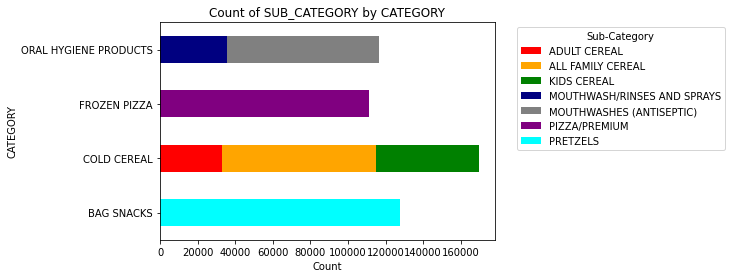

In [79]:
subcategory_counts = fmcg_sales_data.groupby(['CATEGORY', 'SUB_CATEGORY']).size().sort_values(ascending=False)
plt.figure(figsize=(20, 20))
subcategory_counts.unstack().plot(kind='barh', stacked=True, color=['red', 'orange', 'green', 'navy', 'gray', 'purple','cyan'])
plt.xlabel('Count')
plt.ylabel('CATEGORY')
plt.title('Count of SUB_CATEGORY by CATEGORY')
plt.legend(title='Sub-Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [81]:
subcategory_counts_table = fmcg_sales_data.groupby(['CATEGORY', 'SUB_CATEGORY']).size().reset_index(name='COUNT')
subcategory_counts_table

CATEGORY                 SUB_CATEGORY   COUNT
0             BAG SNACKS                     PRETZELS  127461
1            COLD CEREAL                 ADULT CEREAL   32993
2            COLD CEREAL            ALL FAMILY CEREAL   82006
3            COLD CEREAL                  KIDS CEREAL   54689
4           FROZEN PIZZA                PIZZA/PREMIUM  111270
5  ORAL HYGIENE PRODUCTS  MOUTHWASH/RINSES AND SPRAYS   35705
6  ORAL HYGIENE PRODUCTS     MOUTHWASHES (ANTISEPTIC)   80820

#### Count of PROMOTION_SUPPORT by CATEGORY

<Figure size 1440x1440 with 0 Axes>

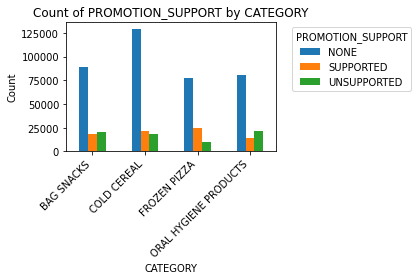

In [86]:
promotion_counts = fmcg_sales_data.groupby(['CATEGORY', 'PROMOTION_SUPPORT']).size().unstack(fill_value=0)
plt.figure(figsize=(20, 20))
promotion_counts.plot(kind='bar', stacked=False)
plt.xlabel('CATEGORY')
plt.ylabel('Count')
plt.title('Count of PROMOTION_SUPPORT by CATEGORY')
plt.legend(title='PROMOTION_SUPPORT', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [87]:
promotion_support_counts = fmcg_sales_data.groupby(['CATEGORY', 'PROMOTION_SUPPORT']).size().reset_index(name='COUNT')
promotion_support_counts

CATEGORY PROMOTION_SUPPORT   COUNT
0              BAG SNACKS              NONE   88720
1              BAG SNACKS         SUPPORTED   17993
2              BAG SNACKS       UNSUPPORTED   20748
3             COLD CEREAL              NONE  129472
4             COLD CEREAL         SUPPORTED   21597
5             COLD CEREAL       UNSUPPORTED   18619
6            FROZEN PIZZA              NONE   77155
7            FROZEN PIZZA         SUPPORTED   24517
8            FROZEN PIZZA       UNSUPPORTED    9598
9   ORAL HYGIENE PRODUCTS              NONE   80212
10  ORAL HYGIENE PRODUCTS         SUPPORTED   14545
11  ORAL HYGIENE PRODUCTS       UNSUPPORTED   21768

#### Count of SEG_VALUE_NAME

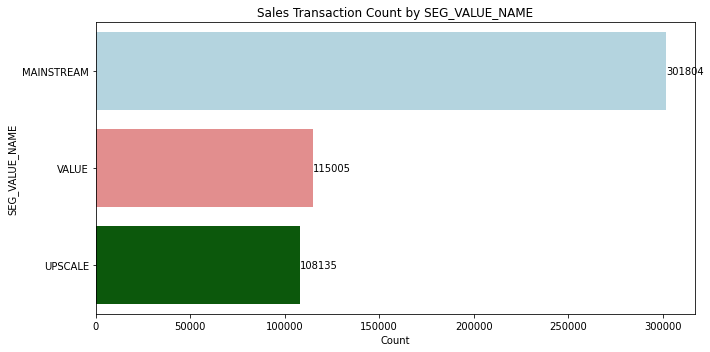

In [90]:
colors = {'VALUE': 'lightcoral', 'MAINSTREAM': 'lightblue', 'UPSCALE': 'darkgreen'}
plt.figure(figsize=(10, 5))
plt.title('Sales Transaction Count by SEG_VALUE_NAME')
ax = sbn.countplot(y=fmcg_sales_data['SEG_VALUE_NAME'],order=fmcg_sales_data['SEG_VALUE_NAME'].value_counts(ascending=False).index, palette=colors)

for container in ax.containers:
    ax.bar_label(container, labels=fmcg_sales_data['SEG_VALUE_NAME'].value_counts(ascending=False).values, label_type='edge')

plt.xlabel("Count")
plt.ylabel("SEG_VALUE_NAME")
plt.tight_layout()
plt.show()

#### Average UNIT_SALES by SEG_VALUE_NAME 

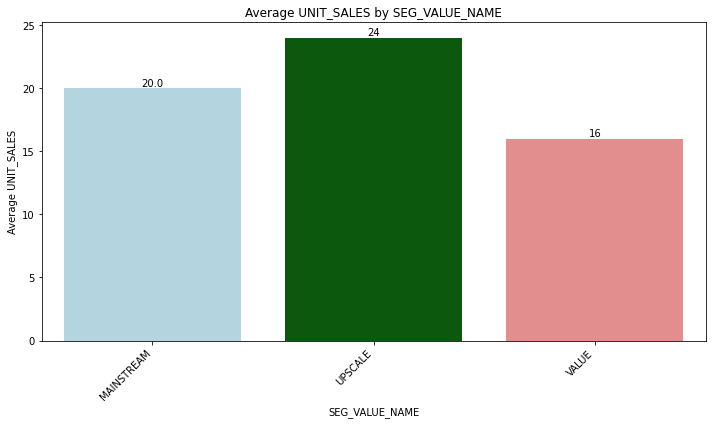

In [91]:
avg_unit_sales = fmcg_sales_data.groupby('SEG_VALUE_NAME')['UNIT_SALES'].mean().round().reset_index()
plt.figure(figsize=(10, 6))

ax = sbn.barplot(x=avg_unit_sales["SEG_VALUE_NAME"], y=avg_unit_sales["UNIT_SALES"], palette=[colors[val] for val in avg_unit_sales["SEG_VALUE_NAME"]])

for container, label in zip(ax.containers, avg_unit_sales['UNIT_SALES']):
    ax.bar_label(container, labels=[label], label_type='edge')

plt.title('Average UNIT_SALES by SEG_VALUE_NAME')
plt.xlabel('SEG_VALUE_NAME')
plt.ylabel('Average UNIT_SALES')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Average REVENUE by SEG_VALUE_NAME

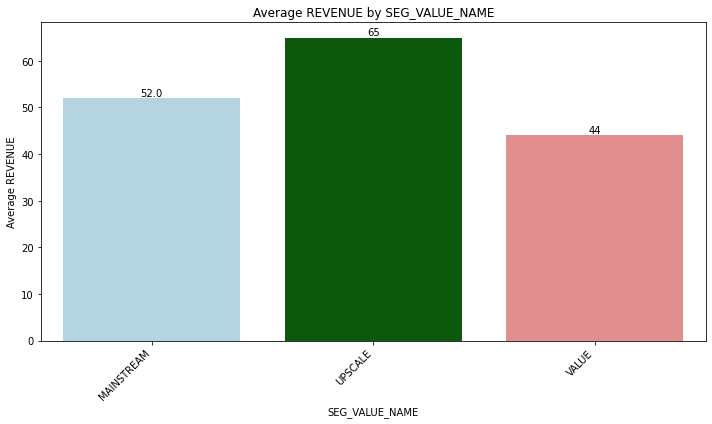

In [92]:
avg_revenue = fmcg_sales_data.groupby('SEG_VALUE_NAME')['REVENUE'].mean().round().reset_index()
plt.figure(figsize=(10, 6))

ax = sbn.barplot(x=avg_revenue["SEG_VALUE_NAME"], y=avg_revenue["REVENUE"], palette=[colors[val] for val in avg_unit_sales["SEG_VALUE_NAME"]])

for container, label in zip(ax.containers, avg_revenue['REVENUE']):
    ax.bar_label(container, labels=[label], label_type='edge')

plt.title('Average REVENUE by SEG_VALUE_NAME')
plt.xlabel('SEG_VALUE_NAME')
plt.ylabel('Average REVENUE')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Distribution of PRICE by CATEGORY

In [94]:
specified_order = ['BAG SNACKS', 'COLD CEREAL', 'ORAL HYGIENE PRODUCTS', 'FROZEN PIZZA']
fig = go.Figure()

for category in specified_order:
    if category in fmcg_sales_data['CATEGORY'].unique():
        fig.add_trace(go.Box(y=fmcg_sales_data[fmcg_sales_data['CATEGORY'] == category]['PRICE'], name=category))

fig.update_layout(title='Distribution of PRICE by CATEGORY',
                  xaxis_title='CATEGORY',
                  yaxis_title='PRICE',
                  width=1000, height=600)
fig.show()

#### Distribution of PRICE by SUB_CATEGORY

In [95]:
specified_order = ['PRETZELS', 'KIDS CEREAL', 'ALL FAMILY CEREAL', 'ADULT CEREAL', 'MOUTHWASH/RINSES AND SPRAYS', 'MOUTHWASHES (ANTISEPTIC)', 'PIZZA/PREMIUM']
fig = go.Figure()

for subcategory in specified_order:
    if subcategory in fmcg_sales_data['SUB_CATEGORY'].unique():
        fig.add_trace(go.Box(y=fmcg_sales_data[fmcg_sales_data['SUB_CATEGORY'] == subcategory]['PRICE'], name=subcategory))

fig.update_layout(title='Distribution of PRICE by SUB_CATEGORY',
                  xaxis_title='SUB_CATEGORY',
                  yaxis_title='PRICE',
                  width=1500, height=600)
fig.show()

#### Distribution of DISCOUNT_RATE by SEG_VALUE_NAME

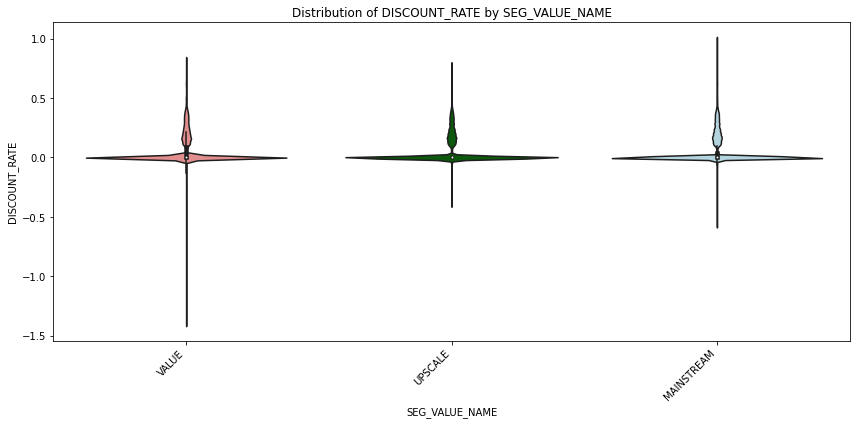

In [98]:
plt.figure(figsize=(12, 6))
sbn.violinplot(x=fmcg_sales_data['SEG_VALUE_NAME'], y=fmcg_sales_data['DISCOUNT_RATE'],
               palette=colors,
               categories=['VALUE','MAINSTREAM','UPSCALE'], ordered=True)
plt.title('Distribution of DISCOUNT_RATE by SEG_VALUE_NAME')
plt.xlabel('SEG_VALUE_NAME')
plt.ylabel('DISCOUNT_RATE')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [101]:
df = fmcg_sales_data.groupby('SEG_VALUE_NAME')['DISCOUNT_RATE'].describe()
df = df.reindex(['VALUE', 'MAINSTREAM', 'UPSCALE'])
df

count      mean       std       min  25%  50%       75%  \
SEG_VALUE_NAME                                                               
VALUE           115005.0  0.060108  0.117671 -1.397260  0.0  0.0  0.085227   
MAINSTREAM      301804.0  0.057333  0.114510 -0.570571  0.0  0.0  0.040161   
UPSCALE         108135.0  0.053715  0.109808 -0.393939  0.0  0.0  0.000000   

                     max  
SEG_VALUE_NAME            
VALUE           0.822394  
MAINSTREAM      0.996923  
UPSCALE         0.780488